In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel('Dataset (3).xlsx')
print(df.to_string())

     Tanggal  Curah Hujan (mm)  Penjualan A (pcs)  Penjualan B (pcs)
0          1               1.4                  0                507
1          2               1.2                 27                 61
2          3              15.2                458                367
3          4              13.4                 20                 21
4          5               7.7                  7                  0
5          6               0.6                  0                469
6          7               1.0                  4                 12
7          8               0.0                350                 44
8          9               0.0                  1                488
9         10               3.2                240                129
10        11               0.0                 13                516
11        12               6.2                169                109
12        13               0.0                  0                235
13        14              37.2    

In [26]:
kolom_penjualan_a = 'Penjualan A (pcs)'

# Menghitung ukuran pemusatan
mean_a = df[kolom_penjualan_a].mean()
median_a = df[kolom_penjualan_a].median()
modus_a = stats.mode(df[kolom_penjualan_a])
modus_a_value = modus_a.mode if modus_a.count > 0 else "Tidak ada modus"
kuartil_1_a = df[kolom_penjualan_a].quantile(0.25)
kuartil_3_a = df[kolom_penjualan_a].quantile(0.75)

# Menghitung ukuran persebaran
range_a = df[kolom_penjualan_a].max() - df[kolom_penjualan_a].min()
iqr_a = kuartil_3_a - kuartil_1_a
variansi_a = df[kolom_penjualan_a].var()
standar_deviasi_a = df[kolom_penjualan_a].std()

# Menampilkan hasil
print("Statistik untuk Penjualan A (pcs):")
print("Mean:", mean_a)
print("Median:", median_a)
print("Modus:", modus_a_value)
print("Kuartil 1:", kuartil_1_a)
print("Kuartil 3:", kuartil_3_a)
print("Range:", range_a)
print("Interquartile Range (IQR):", iqr_a)
print("Variansi:", variansi_a)
print("Standar Deviasi:", standar_deviasi_a)

Statistik untuk Penjualan A (pcs):
Mean: 131.83471074380165
Median: 52.0
Modus: 0
Kuartil 1: 5.0
Kuartil 3: 238.0
Range: 458
Interquartile Range (IQR): 233.0
Variansi: 20049.672451790644
Standar Deviasi: 141.59686596740283


In [40]:
# Menentukan jumlah interval (bins)
num_bins = 10
frekuensi, bins = np.histogram(df[kolom_penjualan_a], bins=num_bins)

# Membuat tabel distribusi frekuensi
tabel_frekuensi = pd.DataFrame({
    'Interval': [f"{int(bins[i])} - {int(bins[i+1])}" for i in range(len(bins)-1)],
    'Frekuensi': frekuensi
})

print("Tabel Distribusi Frekuensi:")
print(tabel_frekuensi)

Tabel Distribusi Frekuensi:
    Interval  Frekuensi
0     0 - 45         59
1    45 - 91          5
2   91 - 137          4
3  137 - 183          8
4  183 - 229         14
5  229 - 274          7
6  274 - 320          9
7  320 - 366          4
8  366 - 412          6
9  412 - 458          5


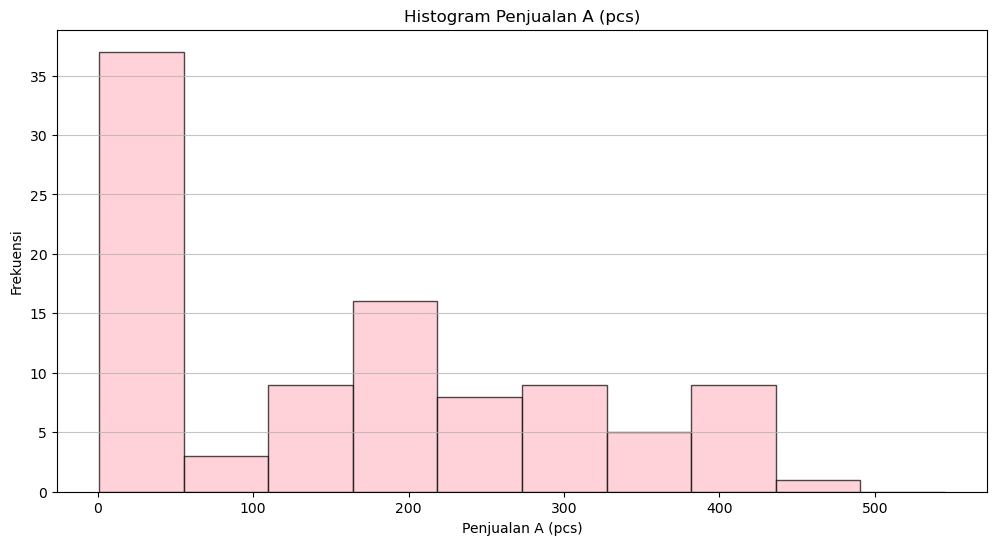

In [50]:
# Histogram
plt.figure(figsize=(12, 6))
plt.hist(df[kolom_penjualan_a], bins=bins, color='pink', alpha=0.7, edgecolor='black')
plt.title('Histogram Penjualan A (pcs)')
plt.xlabel('Penjualan A (pcs)')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.75)
plt.show()

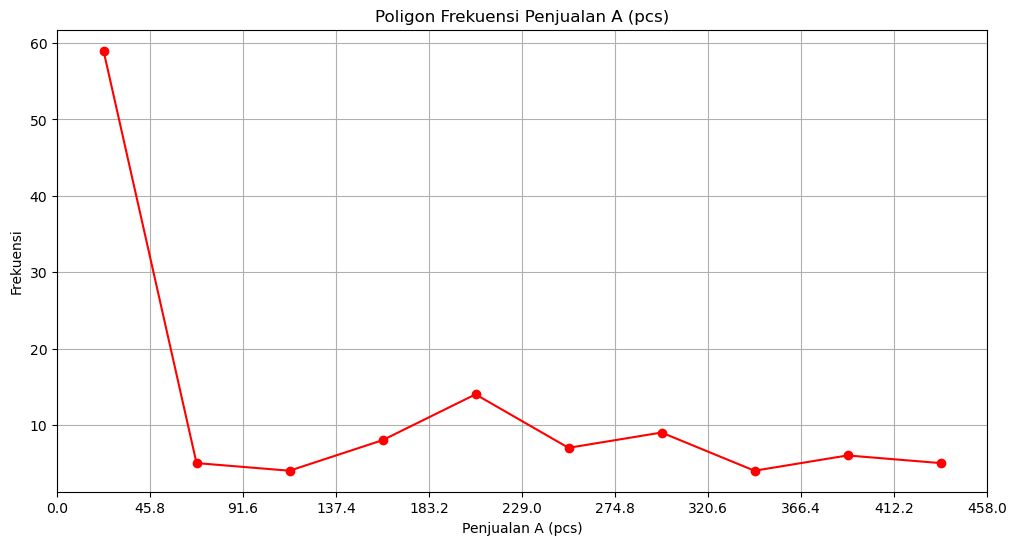

In [44]:
# Poligon Frekuensi
# Hitung titik tengah setiap interval
titik_tengah = (bins[:-1] + bins[1:]) / 2

plt.figure(figsize=(12, 6))
plt.plot(titik_tengah, np.histogram(df[kolom_penjualan_a], bins=bins)[0], marker='o', linestyle='-', color='red')
plt.title('Poligon Frekuensi Penjualan A (pcs)')
plt.xlabel('Penjualan A (pcs)')
plt.ylabel('Frekuensi')
plt.grid()
plt.xticks(bins)  # Menambahkan label pada sumbu x sesuai dengan interval
plt.show()

In [46]:
kolom_penjualan_b = 'Penjualan B (pcs)'

# Tabel Distribusi Frekuensi
# Menentukan jumlah interval (bins)
num_bins = 10

# Membuat histogram untuk menentukan batas bins
frekuensi, bins = np.histogram(df[kolom_penjualan_b], bins=num_bins)

# Menentukan batas bawah untuk interval dimulai dari 1
bins = np.linspace(start=1, stop=df[kolom_penjualan_b].max(), num=num_bins + 1)

# Membuat tabel distribusi frekuensi
tabel_frekuensi = pd.DataFrame({
    'Interval': [f"{int(bins[i])} - {int(bins[i+1])}" for i in range(len(bins)-1)],
    'Frekuensi': np.histogram(df[kolom_penjualan_b], bins=bins)[0]
})

print("Tabel Distribusi Frekuensi untuk Penjualan B (pcs):")
print(tabel_frekuensi)

Tabel Distribusi Frekuensi untuk Penjualan B (pcs):
    Interval  Frekuensi
0     1 - 55         18
1   55 - 109         14
2  109 - 164         24
3  164 - 218          9
4  218 - 273         11
5  273 - 327          8
6  327 - 381          7
7  381 - 436          9
8  436 - 490          7
9  490 - 545          7


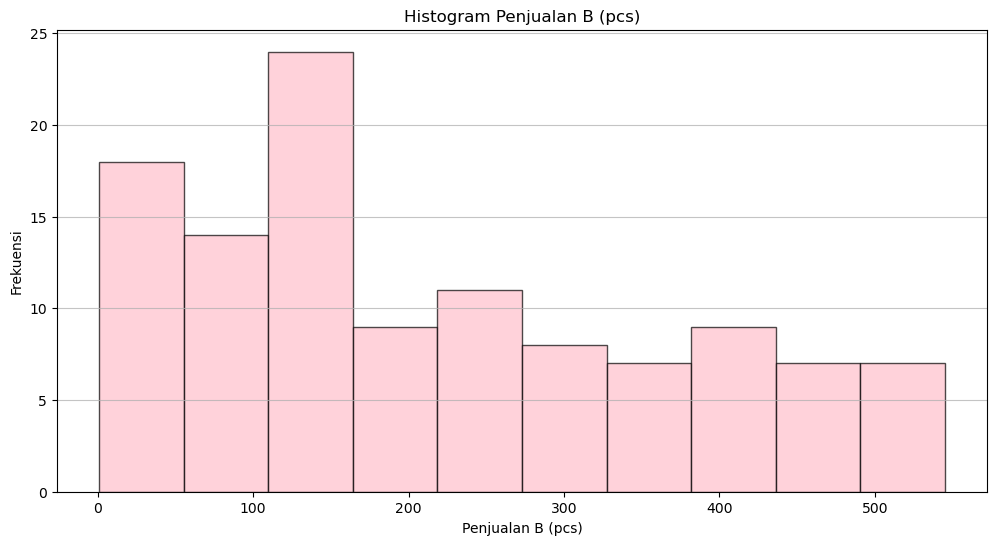

In [52]:
plt.figure(figsize=(12, 6))
plt.hist(df[kolom_penjualan_b], bins=bins, color='pink', alpha=0.7, edgecolor='black')
plt.title('Histogram Penjualan B (pcs)')
plt.xlabel('Penjualan B (pcs)')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.75)
plt.show()

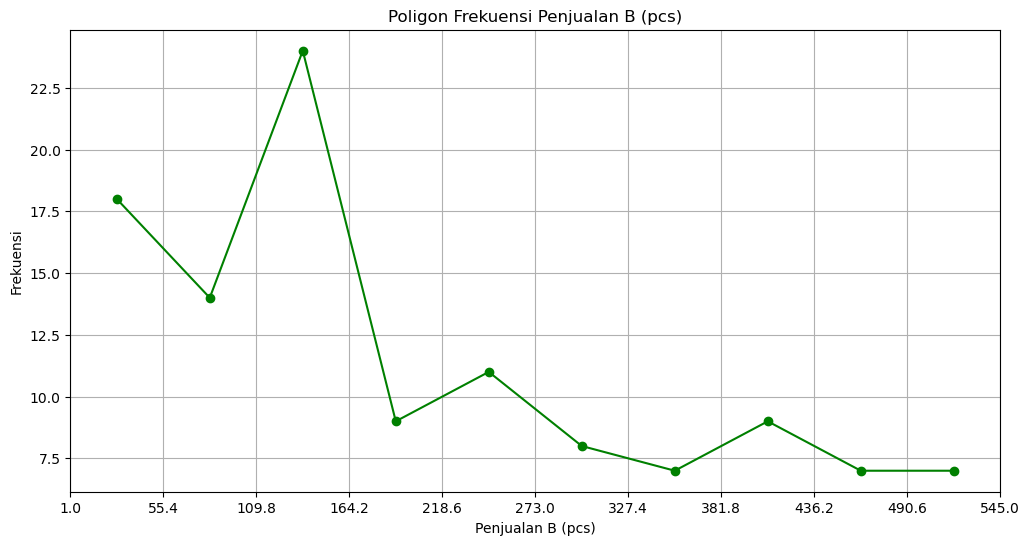

In [58]:
# Poligon Frekuensi
# Hitung titik tengah setiap interval
titik_tengah = (bins[:-1] + bins[1:]) / 2

plt.figure(figsize=(12, 6))
plt.plot(titik_tengah, np.histogram(df[kolom_penjualan_b], bins=bins)[0], marker='o', linestyle='-', color='green')
plt.title('Poligon Frekuensi Penjualan B (pcs)')
plt.xlabel('Penjualan B (pcs)')
plt.ylabel('Frekuensi')
plt.grid()
plt.xticks(bins)  # Menambahkan label pada sumbu x sesuai dengan interval
plt.show()

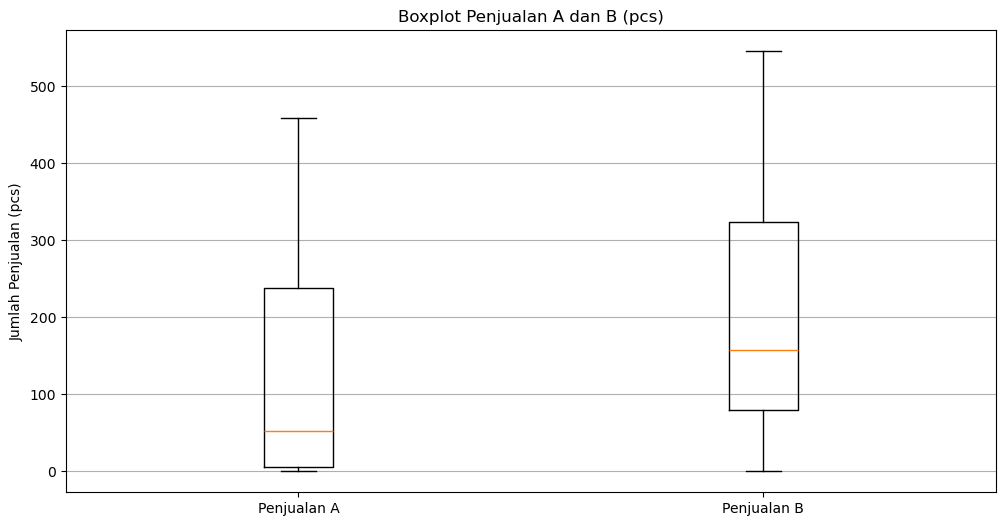

In [60]:
# Membuat boxplot untuk Penjualan A dan B
plt.figure(figsize=(12, 6))
plt.boxplot([df['Penjualan A (pcs)'], df['Penjualan B (pcs)']], labels=['Penjualan A', 'Penjualan B'])
plt.title('Boxplot Penjualan A dan B (pcs)')
plt.ylabel('Jumlah Penjualan (pcs)')
plt.grid(axis='y')
plt.show()

In [ ]:
# Boxplot digunakan untuk melihat sebaran data, menampilkan nilai minimum, median, kuartil, dan pencilan. Ini juga membantu membandingkan beberapa kelompok.

# boxplot memberikan ringkasan statistik, sedangkan histogram menunjukkan frekuensi data dalam interval. Boxplot lebih sederhana untuk perbandingan, sementara histogram lebih detail dalam menggambarkan bagaimana data tersebar.